In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the data/csv file
data=pd.read_csv('Iris.csv')

In [3]:
#intial 5 rows of the csv file
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#removing Iris-setosa species from dataset
data = data.drop(data[data.Species == 'Iris-setosa'].index)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
##deleting SepalLengthCm,SepalWidthCm from the data
data=data.drop(['SepalLengthCm','SepalWidthCm'],axis=1)

In [6]:
#replacing  Iris-versicolor to 0 and Iris-virginica to 1
data = data.replace(to_replace = ['Iris-versicolor','Iris-virginica'],value =[0,1])
data

,PetalLengthCm,PetalWidthCm,Species
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [7]:
versicolor = data.loc[data.Species==0]
virginica = data.loc[data.Species==1]

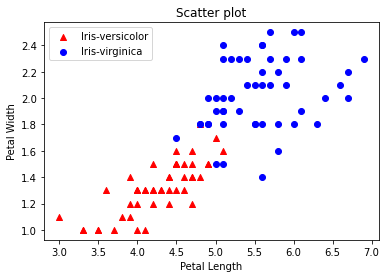

In [8]:
#plotting the dataset
plt.scatter(versicolor.iloc[:,0],versicolor.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica.iloc[:,0],virginica.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot')
plt.legend()
plt.show()

In [9]:
#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
#Extracting the columns
x=data.iloc[:,0:2].values
y=data.iloc[:,2].values

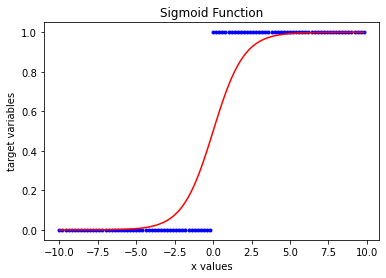

In [11]:
#plotting sigmoid function
x_scale = np.arange(-10., 10., 0.2)
y_scale=sigmoid(x_scale)
plt.title('Sigmoid Function')
plt.xlabel('x values')
plt.ylabel('target variables')
plt.scatter(x_scale,y,marker='.',color='blue')
plt.plot(x_scale,y_scale,color='red')
plt.show()

In [12]:
##Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
y_train1=y_train
y_test1=y_test

In [13]:
y_train1=y_train1.reshape(len(y_train1),1)
X=np.hstack((x_train,y_train1))
X=pd.DataFrame(X)
versicolor_train = X.loc[X.iloc[:,2]==0]
virginica_train = X.loc[X.iloc[:,2]==1]

In [14]:
y_test1=y_test1.reshape(len(y_test1),1)
Y=np.hstack((x_test,y_test1))
Y=pd.DataFrame(Y)
versicolor_test = Y.loc[Y.iloc[:,2]==0]
virginica_test = Y.loc[Y.iloc[:,2]==1]

In [15]:
#initiate the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [16]:
a=logmodel.coef_
a=a.reshape(2,1)
b=logmodel.intercept_

In [17]:
#prediction
predict = logmodel.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
#confusion matrix
confusion_matrix(y_test,predict)

array([[16,  0],
       [ 0, 14]])

In [20]:
#accuracy score for training samples
logmodel.score(x_train, y_train)

0.9428571428571428

In [21]:
#accuracy score for testing samples
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict))

1.0


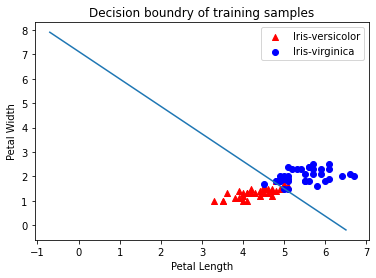

In [22]:
#plotting decision boundry for training samples
x_values_train = [np.min(x_train[:, 0]-4), np.max(x_train[:, 1]+4)]
y_values_train = - (b[0] + a[0]* x_values_train) / a[1]
plt.scatter(versicolor_train.iloc[:,0],versicolor_train.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica_train.iloc[:,0],virginica_train.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Decision boundry of training samples")
plt.legend()
plt.plot(x_values_train,y_values_train)

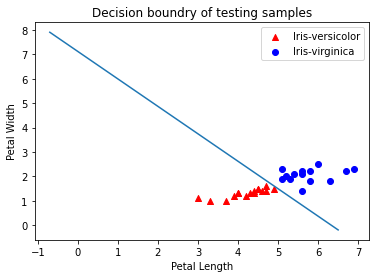

In [23]:
#plotting decision boundry for testing samples
x_values_test = [np.min(x_train[:, 0]-4), np.max(x_train[:, 1]+4)]
y_values_test = - (b[0] + a[0]* x_values_test) / a[1]
plt.scatter(versicolor_test.iloc[:,0],versicolor_test.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica_test.iloc[:,0],virginica_test.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Decision boundry of testing samples")
plt.legend()
plt.plot(x_values_test,y_values_test)